# Pareto front computation

Define Pareto front of a point ensemble to optimize two antagonistic properties.

Here we plot Pareto front for optimizing hardness and ductility of the quinary Nb-Ti-Zr-Cr-Mo, in amorphjous domain and in crystalline domain.

## Import libraries, path for datasets

In [1]:
import ParetoFront as pf
import os
import pandas as pd
datasets_dir=os.getenv("DATASETS_DIR")

## Import databases

In [2]:
databaseRF=pd.read_csv(f'{datasets_dir}Predictions_RF_mechanical_model.csv')
databaseNN=pd.read_csv(f'{datasets_dir}Predictions_NN_mechanical_model.csv')

## Pareto front in amorphous domain

### Filters amorphous compositions from NN predictions and define Pareto optimal compositions

A composition is amorphous if the predicted XRD phase class and the predicted EBSD phase class are both 0.
Properties are predicted by RF, thus we filter corresponding lines of RF prediction dataframe.

In [7]:
amorphous_compo=databaseRF[(databaseNN['NN - Phase prediction from XRD class']==0) & (databaseNN['NN - Phase prediction from EBSD class']==0)]
[pareto_front_amorphous,colors]=pf.pareto_frontier(amorphous_compo,'RF - Hardness prediction (GPa)','deltaH',0.015)

### Plot Pareto frontier of amorphous compositions

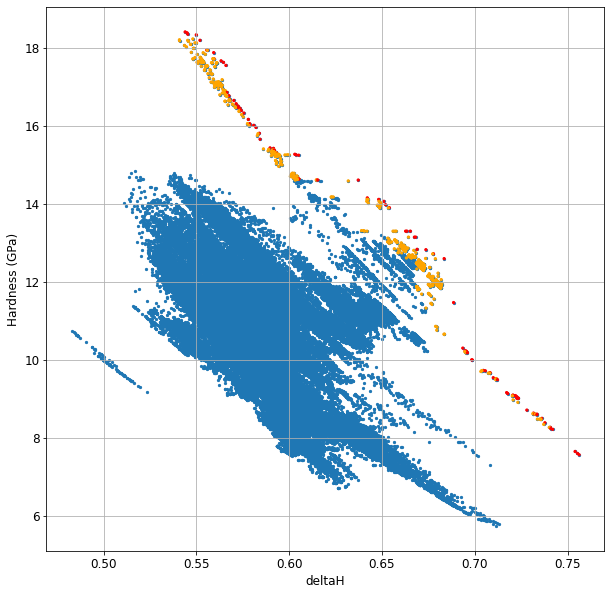

In [9]:
pf.plot_pareto(amorphous_compo,pareto_front_amorphous, 'RF - Hardness prediction (GPa)','deltaH',"deltaH","Hardness (GPa)",colors,'./pareto_amorph')

## Pareto frontier of crystaline composition

### Filters crystalline compositions from NN predictions and define Pareto optimal compositions

A composition is crystalline if the predicted XRD phase class or the predicted EBSD phase class is 1.
Properties are predicted by RF, thus we filter corresponding lines of RF prediction dataframe.

In [3]:
cryst_compo=databaseRF[(databaseNN['NN - Phase prediction from XRD class']==1) | (databaseNN['NN - Phase prediction from EBSD class']==1)]
[pareto_front_cryst,colors]=pf.pareto_frontier(cryst_compo,'RF - Hardness prediction (GPa)','deltaH',0.015)


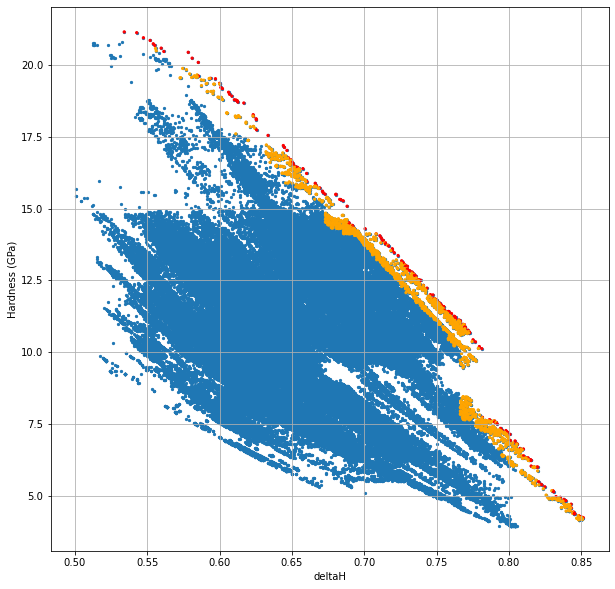

In [4]:
pf.plot_pareto(cryst_compo,pareto_front_cryst, 'RF - Hardness prediction (GPa)','deltaH',"deltaH","Hardness (GPa)",colors,'./pareto_cryst')


In [ ]:
pareto_front_cryst.to_csv('./Pareto_opt_cryst.csv')
pareto_front_amorphous.to_csv('./Pareto_opt_amorph.csv')